# Load Packages

In [91]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


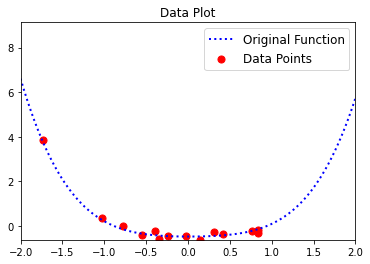

In [92]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [93]:
degree = 4
A = np.zeros((n_data, degree+1)).T # Dummy initialization
for i in range(0, degree+1) :
    A[i] = x_data**i

### Print results (do not modify the following block)

In [94]:
print(A)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 7.69458258e-01 -5.48726825e-01 -3.96088994e-01 -3.44457358e-01
  -1.73259726e+00 -1.02635747e+00  8.31832735e-01  4.18095727e-01
  -7.73450895e-01  1.41388300e-01  3.16614871e-01  8.32089704e-01
  -2.03496622e-02 -2.43428332e-01 -2.17955166e+00]
 [ 5.92066011e-01  3.01101129e-01  1.56886491e-01  1.18650871e-01
   3.00189326e+00  1.05340965e+00  6.91945699e-01  1.74804037e-01
   5.98226287e-01  1.99906515e-02  1.00244977e-01  6.92373276e-01
   4.14108750e-04  5.92573530e-02  4.75044544e+00]
 [ 4.55570081e-01 -1.65222266e-01 -6.21410124e-02 -4.08701656e-02
  -5.20107204e+00 -1.08117486e+00  5.75583083e-01  7.30848209e-02
  -4.62698657e-01  2.82644423e-03  3.17390503e-02  5.76116675e-01
  -8.42697316e-06 -1.44249186e-02 -1.03538413e+01]
 [ 3

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [95]:
degree = 4
w_est = np.zeros((degree+1,1))
y_est = np.zeros_like(x_list)

pinv_A = np.linalg.pinv(A)

w_est = np.array(y_data) @ pinv_A

print(w_est)
for i in range(0, degree+1) :
    y_est += w_est[i]*x_list**i

[-0.44892915  0.04218512  0.29573867 -0.22965006  0.26044299]


### Print results (do not modify the following block)

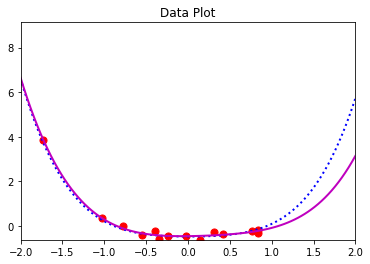

In [96]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
#plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [97]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)).T
w_est1 = np.zeros((degree1+1,1))
y_est1 = np.zeros_like(x_list)

for i in range(0, 2) :
    A1[i] = x_data**i

pinv_A1 = np.linalg.pinv(A1)

w_est1 = np.array(y_data) @ pinv_A1

print(w_est1)
for i in range(0, degree1+1) :
    y_est1 += w_est1[i]*x_list**i

[ 0.04199764 -2.19963918]


### Print results (do not modify the following block)

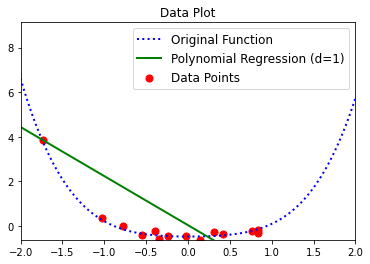

In [98]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [99]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))
w_est2 = np.zeros((degree2+1,1))
y_est2 = np.zeros_like(x_list)

A2 = np.transpose(A2)
for i in range(0, degree2+1) :
    A2[i] = x_data**i

pinv_A2 = np.linalg.pinv(A2)

w_est2 = np.array(y_data) @ pinv_A2

print(w_est2)

for i in range(0, degree2+1) :
    y_est2 += w_est2[i]*x_list**i

[ -0.55503499  -0.06824417   3.06283165   3.21734208 -15.5010809
 -18.29479319  28.94669488  34.22536126 -12.69318897 -21.69056591
  -5.4726522 ]


### Print results (do not modify the following block)

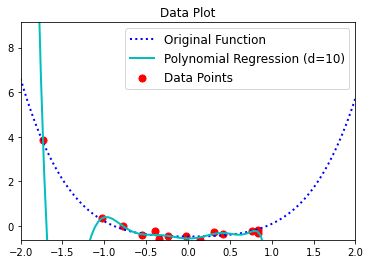

In [100]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

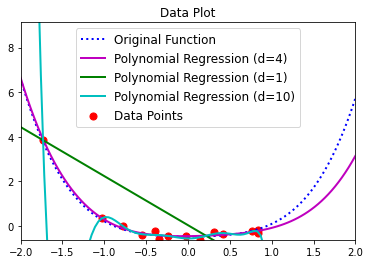

In [103]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!

In [102]:
'''
low degree
pros : 테스트 데이터를 어느정도 대표할 수 있다.
cons : 오차의 범위가 매우 크다.
high degree
pros : 테스트 데이터에 대해서는 잘 들어 맞는다.
cons : 새로운 데이터가 주어졌을때 잘 맞지 않는 경우가 발생하기 쉽다.

phenomenon name : overfitting(과적합), underfitting(과소적합)
'''

'\nlow degree\npros : 테스트 데이터를 잘 대표할 수 있으며 범위내에 대부분의 데이터를 담을 수 있다.\ncons : 오차의 범위가 매우 크다.\nhigh degree\npros : 테스트 데이터에 대해서는 잘 들어 맞는다.\ncons : 새로운 데이터가 주어졌을때 잘 맞지 않는 경우가 발생하기 쉽다.\n\nphenomenon name : overfitting(과적합), underfitting(과소적합)\n'